<a href="https://colab.research.google.com/github/nandaglhp/PCVK_Ganjil_2023/blob/main/Week12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Mahasiswa

Nama: Ananda Galih Pratiwi

Kelas: TI-3F

Absen: 05

NIM: 2141720045

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [43]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
from PIL import Image as img
import math

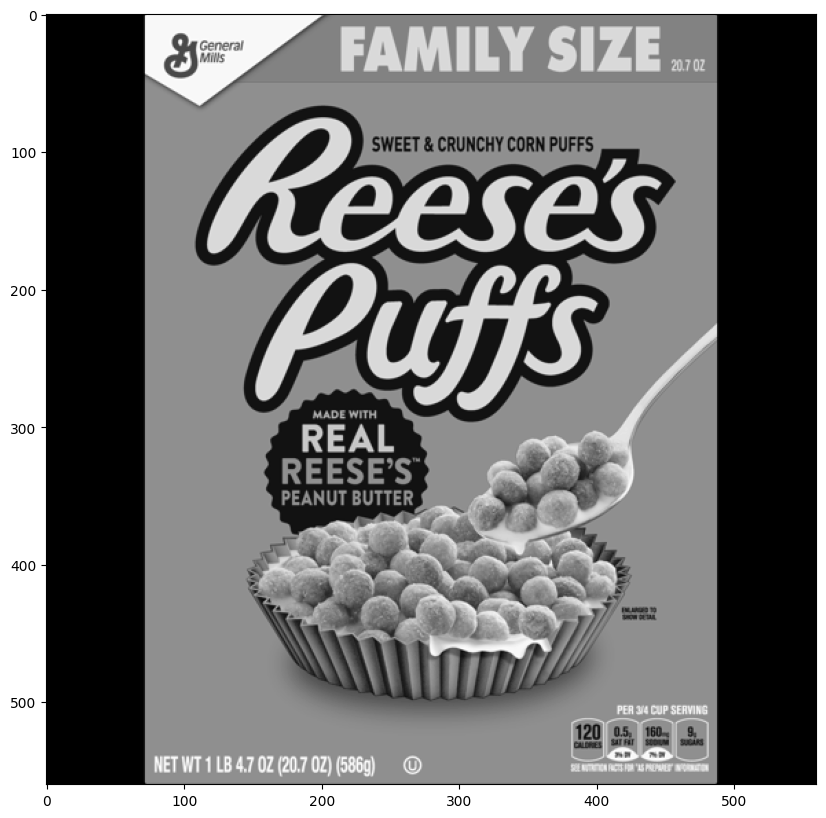

In [59]:
def display(img,cmap='gray'):
  fig = plt.figure(figsize=(12,10))
  ax = fig.add_subplot(111)
  ax.imshow(img,cmap='gray')

path_reeses = '/content/drive/MyDrive/College/05 - Semester 5/PCVK/dataset/facedet/reeses_puffs.png'
reeses = cv.imread(path_reeses,0)
display(reeses)

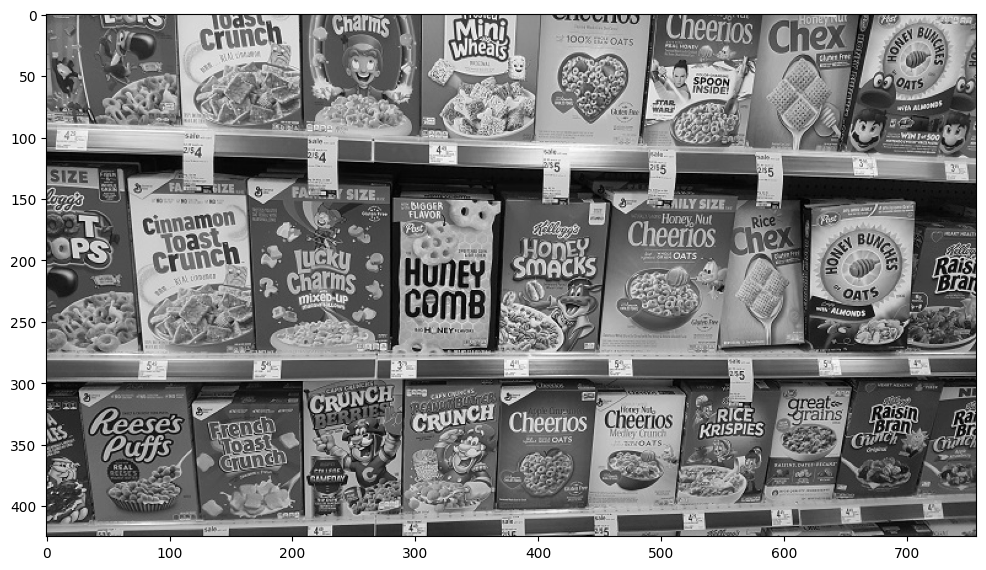

In [60]:
path_cereals = '/content/drive/MyDrive/College/05 - Semester 5/PCVK/dataset/facedet/many_cereals.jpg'
cereals = cv.imread(path_cereals,0)
display(cereals)

In [68]:
orb = cv.ORB_create()

kp1,des1 = orb.detectAndCompute(reeses,None)
kp2,des2 = orb.detectAndCompute(cereals,None)
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck = True)

matches = bf.match(des1,des2)

single_match = matches[0]
single_match.distance

71.0

In [69]:
len(matches)

139

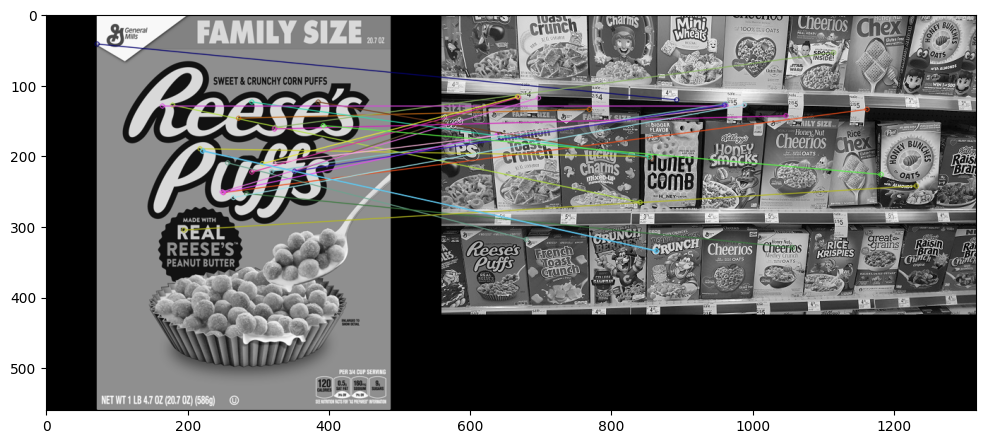

In [70]:
matches = sorted(matches, key=lambda x:x.distance)
reeses_match = cv.drawMatches(reeses,kp1,cereals,kp2,matches[:25],None,flags=2)
display(reeses_match)

In [75]:
!pip install opencv-contrib-python==4.8.0.74

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 MB 8.9 MB/s eta 0:00:00
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 4.8.0.76
    Uninstalling opencv-contrib-python-4.8.0.76:
      Successfully uninstalled opencv-contrib-python-4.8.0.76


In [77]:
sift = cv.xfeatures2d.SIFT_create()
kp1,des1 = sift.detectAndCompute(reeses,None)
kp2,des2 = sift.detectAndCompute(cereals,None)
bf = cv.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)

good = []

# Makin kecil jarak makin cocok
# ratio match1 < 75% Match2
for match1,match2 in matches:
  #jika jarak match1 lebih kecil dari jarak 75% match2
  # descriptor disimpan
  if match1.distance < 0.75*match2.distance:
    good.append([match1])

len(good)

79

In [78]:
len(matches)

1501

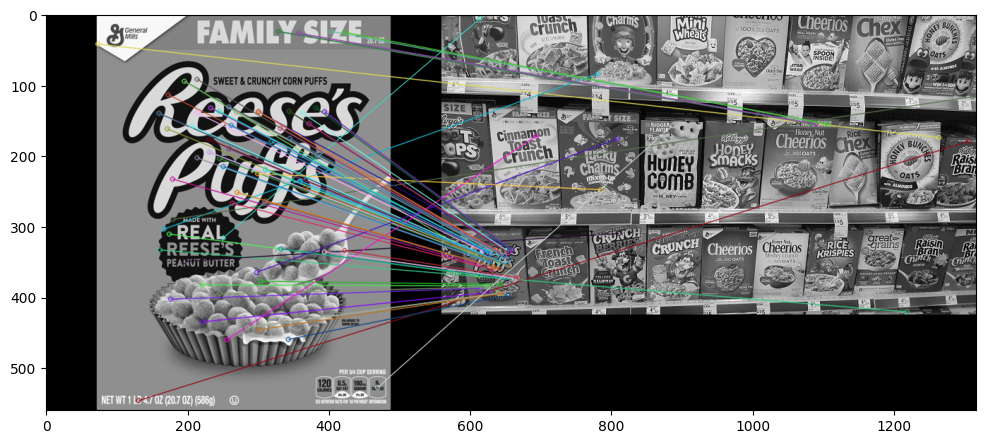

In [79]:
sift_matches = cv.drawMatchesKnn(reeses,kp1,cereals,kp2,good,None,flags=2)
display(sift_matches)

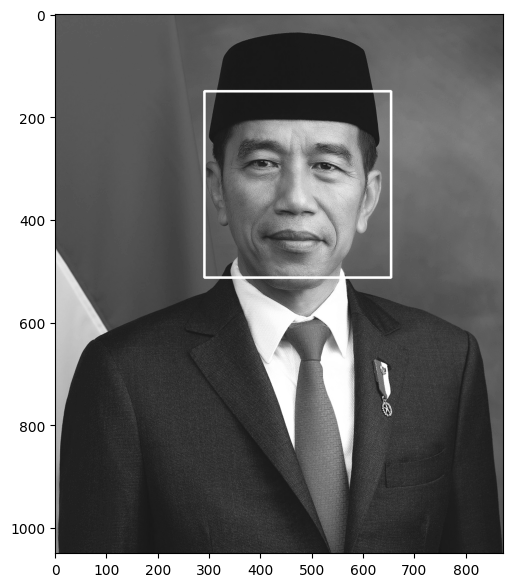

In [84]:
# Jokowi

# Mendefinisikan path untuk Cascade Classifier (dalam hal ini, detektor wajah)
path_cascade_wajah = '/content/drive/MyDrive/College/05 - Semester 5/PCVK/dataset/haarcascades/haarcascade_frontalface_alt.xml'

# Membuat objek Cascade Classifier untuk deteksi wajah
cascade_wajah = cv.CascadeClassifier(path_cascade_wajah)

# Menentukan path gambar Jokowi
path_jokowi = '/content/drive/MyDrive/College/05 - Semester 5/PCVK/dataset/facedet/jokowi.jpg'

# Membaca gambar Jokowi dalam mode grayscale (0 untuk membaca dalam skala abu-abu)
jokowi = cv.imread(path_jokowi, 0)

# Mendeteksi wajah dalam gambar Jokowi menggunakan Cascade Classifier
roi_wajah = cascade_wajah.detectMultiScale(jokowi)

# Menggambar kotak di sekitar wajah yang terdeteksi pada gambar Jokowi
for(x, y, w, h) in roi_wajah:
    cv.rectangle(jokowi, (x, y), (x+w, y+h), (255, 255, 255), 3)

# Menampilkan gambar Jokowi yang sudah dideteksi wajahnya dengan kotak di sekitar wajah
plt.figure(figsize=(7, 7))
plt.imshow(jokowi, cmap='gray')
plt.show()

In [30]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


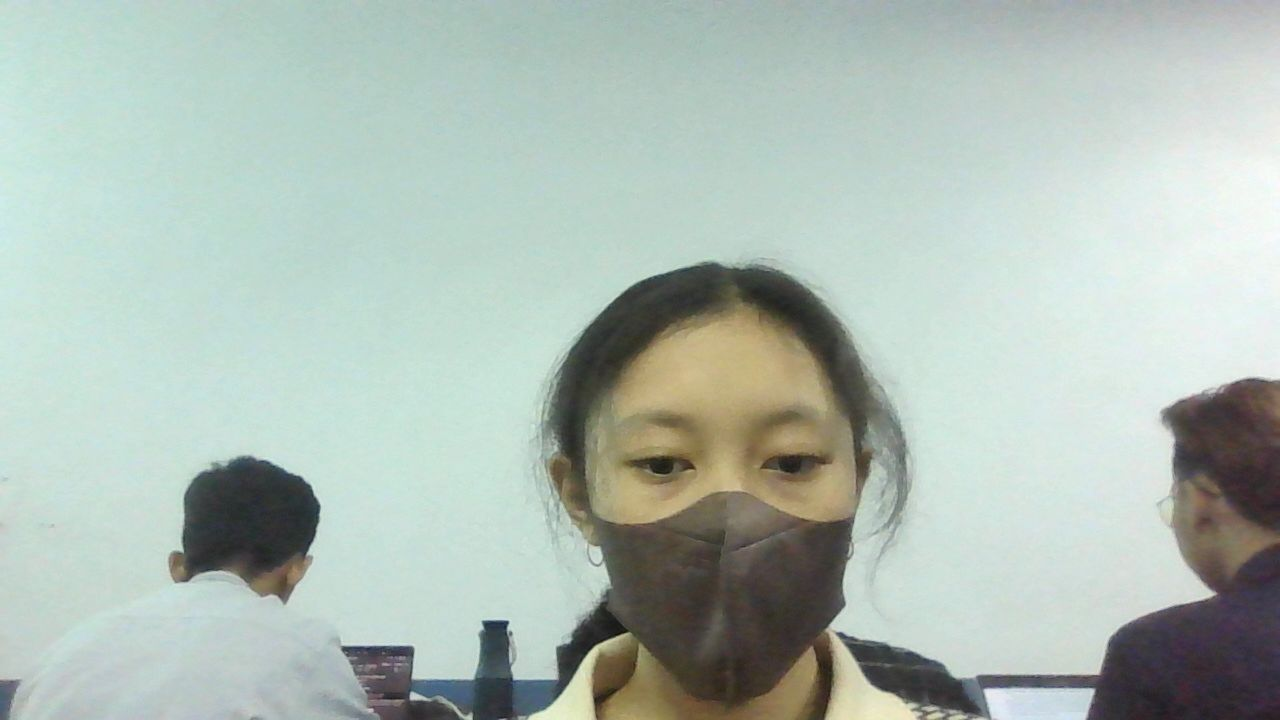

In [31]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

# Tugas Praktikum

1. Lakukan Face Detection untuk image object lain yang tersedia pada (/images/facedet).


NameError: ignored

<Figure size 1000x1000 with 0 Axes>

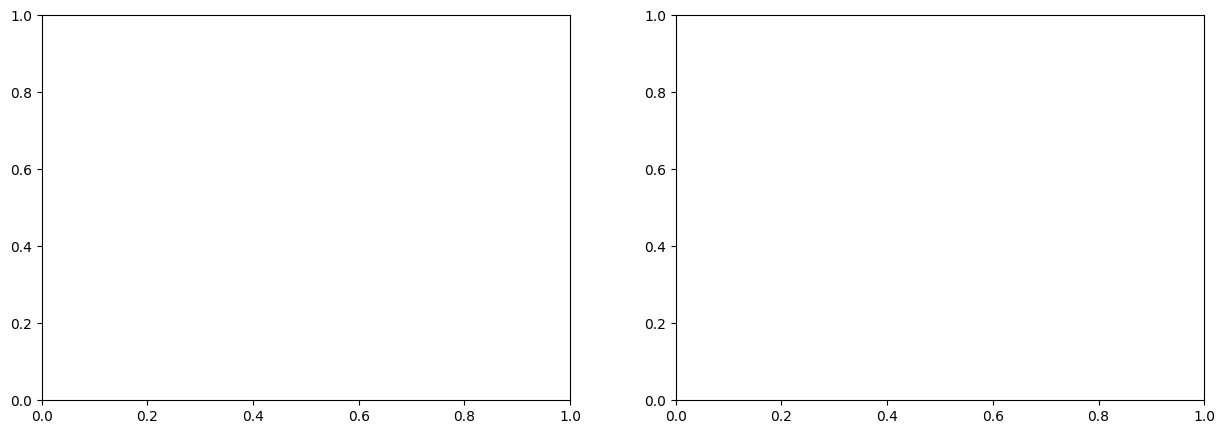

In [88]:
# Mendefinisikan path cascade classifier
path_cascade = '/content/drive/MyDrive/College/05 - Semester 5/PCVK/dataset/haarcascades/haarcascade_frontalface_alt.xml'

# Membuat objek Cascade Classifier untuk deteksi wajah
cascade_wajah = cv.CascadeClassifier(path_cascade)

# Menentukan path gambar Jokowi
path_jokowi = '/content/drive/MyDrive/College/05 - Semester 5/PCVK/dataset/facedet/jokowi.jpg'

# Membaca gambar Jokowi sebagai warna
jokowi = cv.imread(path_jokowi)
jokowi1 = cv.imread(path_jokowi)

# Mendeteksi wajah dalam gambar Jokowi
roi_wajah1 = cascade_wajah.detectMultiScale(jokowi1)

# Mendeteksi wajah dalam gambar Jokowi
roi_wajah = cascade_wajah.detectMultiScale(jokowi)

# Menggambar kotak di sekitar wajah yang terdeteksi pada gambar Jokowi
for(x, y, w, h) in roi_wajah:
    cv.rectangle(jokowi, (x, y), (x+w, y+h), (0, 255, 0), 3)

# Menampilkan gambar Jokowi sebelum dan setelah deteksi wajah
plt.figure(figsize=(10, 10))

# Membuat gambar subplot dengan 1 baris dan 2 kolom, serta menentukan ukuran figur (lebar: 15 inci, tinggi: 5 inci)
f, axarr = plt.subplots(1, 2, figsize=(15, 5))
# Menampilkan gambar di subplot pertama (posisi 1 dari 1x2 grid)
plt.subplot(121), plt.imshow(cv2.cvtColor(jokowi1, cv2.COLOR_BGR2RGB))
# Menampilkan gambar di posisi pertama (indeks 0) dari array gambar pada subplot pertama
axarr[0].imshow(cv2.cvtColor(jokowi1, cv2.COLOR_BGR2RGB))
# Menampilkan gambar di subplot kedua (posisi 2 dari 1x2 grid)
plt.subplot(122), plt.imshow(cv2.cvtColor(jokowi, cv2.COLOR_BGR2RGB))
# Menampilkan gambar di posisi kedua (indeks 1) dari array gambar pada subplot kedua
axarr[1].imshow(cv2.cvtColor(jokowi, cv2.COLOR_BGR2RGB))
# Menampilkan plot yang berisi gambar-gambar yang ditampilkan pada subplot
plt.show()

<Figure size 1000x1000 with 0 Axes>

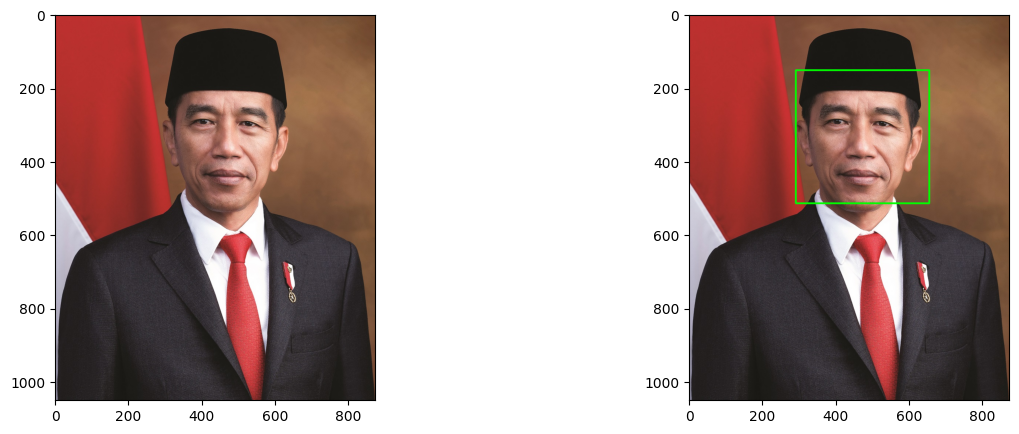

<Figure size 1000x1000 with 0 Axes>

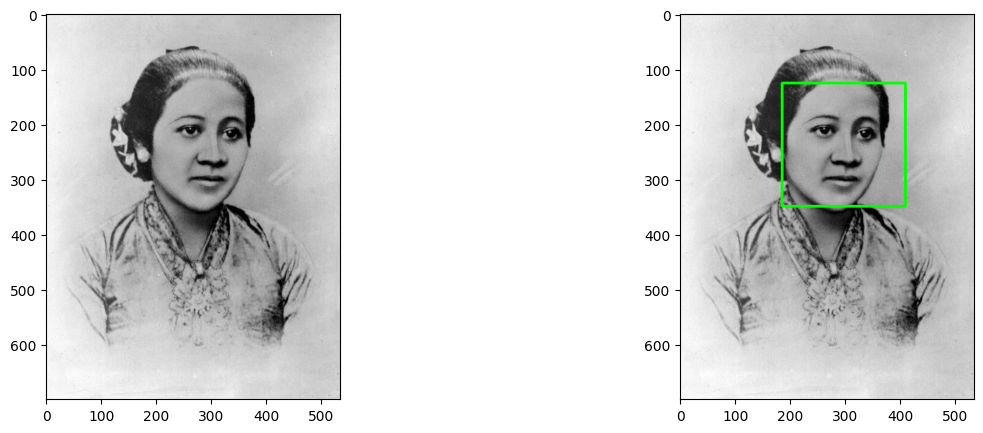

<Figure size 1000x1000 with 0 Axes>

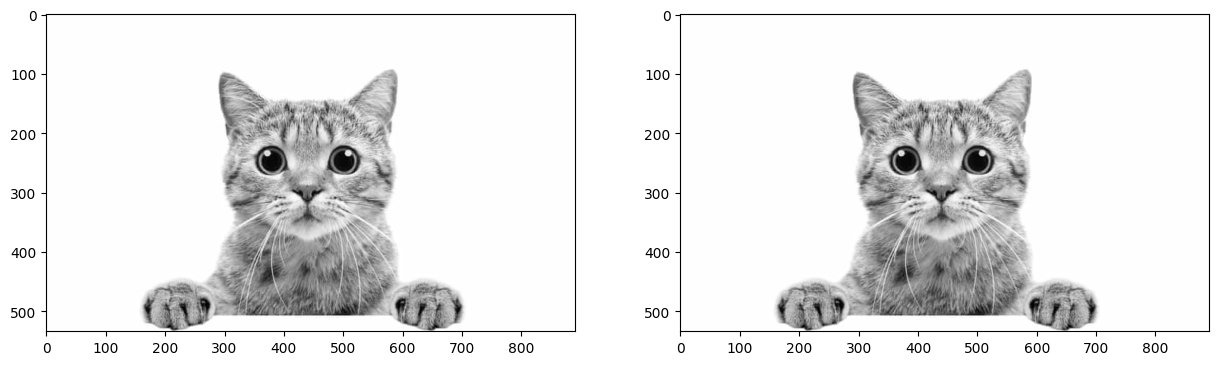

<Figure size 1000x1000 with 0 Axes>

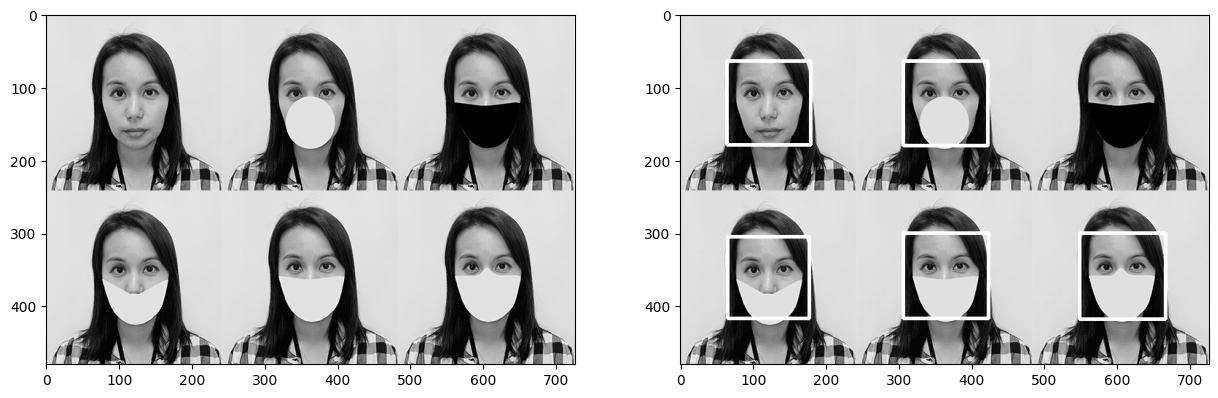

<Figure size 1000x1000 with 0 Axes>

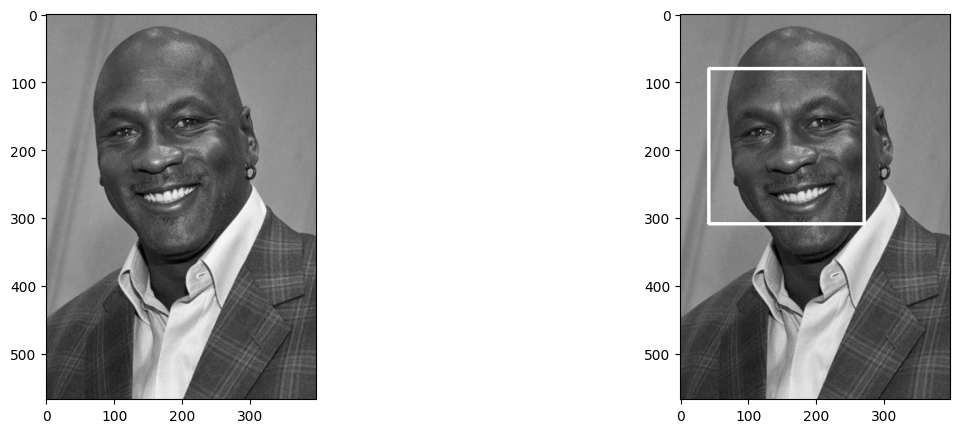

In [80]:
# Nomor 2 (Face Det)
path_cascade = '/content/drive/MyDrive/College/05 - Semester 5/PCVK/dataset/haarcascades/haarcascade_frontalface_alt.xml'
cascade_wajah = cv.CascadeClassifier(path_cascade)

# Jokowi
path_jokowi = '/content/drive/MyDrive/College/05 - Semester 5/PCVK/dataset/facedet/jokowi.jpg'
jokowi = cv.imread(path_jokowi)
jokowi1 = cv.imread(path_jokowi)

roi_wajah1 = cascade_wajah.detectMultiScale(jokowi1)

roi_wajah = cascade_wajah.detectMultiScale(jokowi)
for(x,y,w,h) in roi_wajah:
 cv.rectangle(jokowi,(x,y),(x+w,y+h),(0,255,0),3)
plt.figure(figsize = (10,10))

f, axarr = plt. subplots(1,2,figsize=(15,5))
plt.subplot(121),plt.imshow(cv.cvtColor(jokowi1, cv.COLOR_BGR2RGB))
axarr[0].imshow(cv.cvtColor(jokowi1, cv.COLOR_BGR2RGB))
plt.subplot(122),plt.imshow(cv.cvtColor(jokowi, cv.COLOR_BGR2RGB))
axarr[1].imshow(cv.cvtColor(jokowi, cv.COLOR_BGR2RGB))
plt.show()

# RA.Kartini
path_kartini = '/content/drive/MyDrive/College/05 - Semester 5/PCVK/dataset/facedet/kartini.jpg'
kartini = cv.imread(path_kartini)
kartini1 = cv.imread(path_kartini)
roi_wajah1 = cascade_wajah.detectMultiScale(kartini1)

roi_wajah = cascade_wajah.detectMultiScale(kartini)
for(x,y,w,h) in roi_wajah:
 cv.rectangle(kartini,(x,y),(x+w,y+h),(0,255,0),3)
plt.figure(figsize = (10,10))

f, axarr = plt. subplots(1,2,figsize=(15,5))
plt.subplot(121),plt.imshow(cv.cvtColor(kartini1, cv.COLOR_BGR2RGB))
axarr[0].imshow(cv.cvtColor(kartini1, cv.COLOR_BGR2RGB))
plt.subplot(122),plt.imshow(cv.cvtColor(kartini, cv.COLOR_BGR2RGB))
axarr[1].imshow(cv.cvtColor(kartini, cv.COLOR_BGR2RGB))
plt.show()

# Kucing
path_kucing = '/content/drive/MyDrive/College/05 - Semester 5/PCVK/dataset/facedet/kucing.jpg'
kucing = cv.imread(path_kucing)
kucing1 = cv.imread(path_kucing)

kucing_ori = cv.cvtColor(kucing, cv.COLOR_BGR2GRAY)
kucing_ori1 = cv.cvtColor(kucing1, cv.COLOR_BGR2GRAY)

roi_wajah = cascade_wajah.detectMultiScale(kucing1)
for (x,y,w,h) in roi_wajah:
  cv.rectangle(kucing1,(x,y),(x+w,y+h),(255,0,255),3)
plt.figure(figsize = (10,10))

f, axarr = plt. subplots(1,2,figsize=(15,5))
plt.subplot(121),plt.imshow(kucing_ori, cmap='gray')
plt.subplot(122),plt.imshow(kucing_ori1, cmap='gray')
plt.show()

# Perempuan Maskeran
path_mask = '/content/drive/MyDrive/College/05 - Semester 5/PCVK/dataset/facedet/mask.png'
mask = cv.imread(path_mask, 0)
mask1 = cv.imread(path_mask, 0)

roi_wajah = cascade_wajah.detectMultiScale(mask1)
for(x,y,w,h) in roi_wajah:
 cv.rectangle(mask1,(x,y),(x+w,y+h),(255,0,255),3)
plt.figure(figsize = (10,10))

f, axarr = plt. subplots(1,2,figsize=(15,5))
plt.subplot(121),plt.imshow(mask, cmap='gray')
plt.subplot(122),plt.imshow(mask1, cmap='gray')
plt.show()

# M. Jordan
path_jordan = '/content/drive/MyDrive/College/05 - Semester 5/PCVK/dataset/facedet/mjordan.jpg'
jordan = cv.imread(path_jordan, 0)
jordan1 = cv.imread(path_jordan, 0)

roi_wajah = cascade_wajah.detectMultiScale(jordan1)
for(x,y,w,h) in roi_wajah:
 cv.rectangle(jordan1,(x,y),(x+w,y+h),(255,0,255),3)
plt.figure(figsize = (10,10))

f, axarr = plt. subplots(1,2,figsize=(15,5))
plt.subplot(121),plt.imshow(jordan, cmap='gray')
plt.subplot(122),plt.imshow(jordan1, cmap='gray')
plt.show()


